In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive
%cd My\ Drive
%cd LSU
%cd Dataset
%cd Titanic\ dataset

/content/drive
/content/drive/My Drive
/content/drive/My Drive/LSU
/content/drive/My Drive/LSU/Dataset
/content/drive/My Drive/LSU/Dataset/Titanic dataset


**Importing the needed library and packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

**Loading the data in the nb and displaying the first 5 rows**

In [ ]:
df= pd.read_csv('train.csv')
df.head()
#df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Getting basic information about the data**

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Converting categorical variables to numerical variable**

In [ ]:
df.Sex=df.Sex.map({'male':0, 'female':1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
ports=pd.get_dummies(df.Embarked, prefix='Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
df=df.join(ports)
df.drop(['Embarked'], axis=1, inplace=True)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,0,0


**Creating a basic graph to see what age group were the ppl that survived the most**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


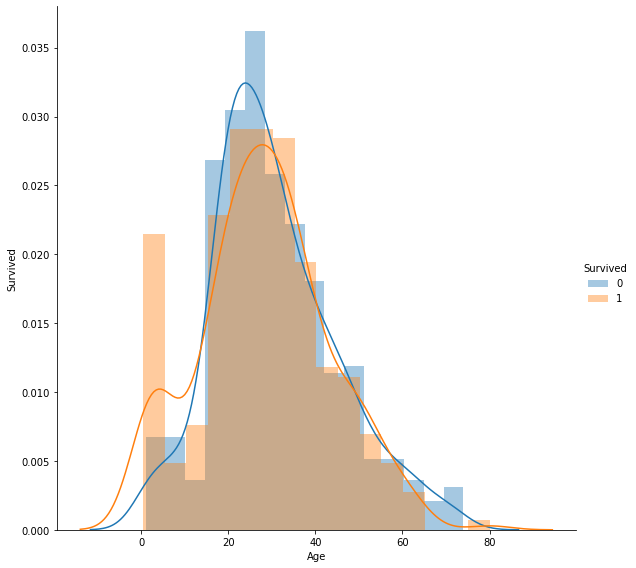

In [ ]:
sns.FacetGrid(df,hue='Survived',height=8).map(sns.distplot,'Age').set_axis_labels('Age',
'Survived').add_legend()
plt.show()

**Assigning the predicting variable the values**

In [ ]:
y=df.Survived.copy()

**Dropping the not so important columns from the dataframe**

In [ ]:
df=df.drop(['Survived','Cabin','Name','Ticket','Fare', 'PassengerId'], axis=1)


In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,0,0,1
1,1,1,38.0,1,0,1,0,0
2,3,1,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,3,0,35.0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Embarked_C  891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(3)
memory usage: 37.5 KB


**Filling the empty rows of age with the mean value**

In [ ]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,0,0,1
1,1,1,38.0,1,0,1,0,0
2,3,1,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,3,0,35.0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Embarked_C  891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(3)
memory usage: 37.5 KB


**Splitting the data set into two the training and testing data set**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size = 0.22,shuffle = True, random_state=0)

**Scaling the values**

In [ ]:
scalerModel = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scalerModel.fit_transform(X_train)

In [ ]:
X_train

array([[ 8.21711323e-01,  1.37100986e+00, -2.18789624e+00, ...,
        -4.66415973e-01, -3.10429555e-01,  6.07318938e-01],
       [-1.57437127e+00, -7.29389354e-01,  3.24198560e-01, ...,
        -4.66415973e-01, -3.10429555e-01,  6.07318938e-01],
       [ 8.21711323e-01, -7.29389354e-01,  1.46605983e+00, ...,
        -4.66415973e-01, -3.10429555e-01,  6.07318938e-01],
       ...,
       [ 8.21711323e-01, -7.29389354e-01, -3.20217338e-03, ...,
        -4.66415973e-01,  3.22134276e+00, -1.64658129e+00],
       [ 8.21711323e-01,  1.37100986e+00,  4.76446730e-01, ...,
        -4.66415973e-01, -3.10429555e-01,  6.07318938e-01],
       [-3.76329976e-01, -7.29389354e-01,  2.30342477e+00, ...,
        -4.66415973e-01, -3.10429555e-01,  6.07318938e-01]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2) 

**Applying the Logistic Regression Model**

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(X_train, y_train)

0.8089887640449438

In [ ]:
model.score(X_test,y_test)

0.7821229050279329